In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import os

from skopt import load
from skopt.plots import plot_evaluations, plot_convergence, plot_objective
import matplotlib.ticker as plticker
import seaborn as sns
%matplotlib inline

In [3]:
folder = "../../../data/results/autorec/logs-1552813337-1HL-loss/"

In [4]:
opt_res = load("{:s}/optimize.gz".format(folder))

In [5]:
df = pd.read_csv("{:s}/results.csv".format(folder))
names = df.drop(['Recall@20', 'Recall@50', 'NDCG@100',
       'Coverage'], axis=1).columns
names = list(names)

In [25]:
#axes = plot_evaluations(opt_res, bins=10, dimensions=names)
#axes.flatten()[0].figure.savefig("evaluations.pdf", bbox_inches = "tight")

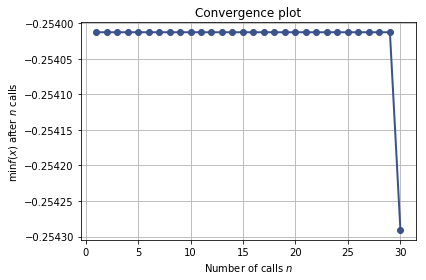

In [7]:
axes = plot_convergence(opt_res)
#axes.figure.savefig("convergence.pdf")

In [24]:
#axes = plot_objective(opt_res, dimensions=names)
#axes.flatten()[0].yaxis.set_major_locator(plticker.MaxNLocator(3))
#axes.flatten()[3].yaxis.set_major_locator(plticker.MaxNLocator(4))
#axes.flatten()[3].xaxis.set_major_locator(plticker.MaxNLocator(3))
#axes.flatten()[0].figure.savefig("objective.pdf", bbox_inches = "tight")

In [13]:
df = df.replace("<function log_loss at 0x2adef063b840>", "log_loss")
df = df[df['loss_function'] != 'kullback_leibler_divergence']
#df = df[df['l1_rate'] < 10e-5]
#df = df[df['hidden_layers'] < 4]

In [14]:
df.sort_values(by="NDCG@100", ascending=False)

loss_function  Recall@20  Recall@50  NDCG@100  Coverage
29             poisson   0.280943   0.455803  0.254291  0.135091
0              poisson   0.281690   0.458183  0.254013  0.134743
26             poisson   0.279955   0.456822  0.254008  0.135846
14             poisson   0.279740   0.456823  0.253999  0.134278
28             poisson   0.280784   0.455773  0.253786  0.133755
11            log_loss   0.280631   0.456625  0.252096  0.133639
9             log_loss   0.282075   0.457081  0.251694  0.132942
22            log_loss   0.280010   0.458664  0.251471  0.127889
27            log_loss   0.280949   0.456782  0.251176  0.130154
21            log_loss   0.279466   0.457759  0.251055  0.136834
3             log_loss   0.281433   0.457771  0.251014  0.132536
24             logcosh   0.219319   0.362393  0.198492  0.042165
2              logcosh   0.215948   0.352259  0.197494  0.029911
15             logcosh   0.217398   0.366435  0.196436  0.045766
20  mean_squared_error   0.218624   0.374383  0.196079  0.076838
13             logcosh   0.213876   0.350816  0.195367  0.032118
18             logcosh   0.213882   0.362636  0.195331  0.053432
4   mean_squared_error   0.214546   0.370793  0.194984  0.076548
16  mean_squared_error   0.214700   0.369323  0.194778  0.074922
6     cosine_proximity   0.191410   0.346858  0.176342  0.125276
17    cosine_proximity   0.192087   0.345231  0.175617  0.124056
25    cosine_proximity   0.192227   0.345064  0.175548  0.124056
12    cosine_proximity   0.191988   0.345569  0.175497  0.122372
8     cosine_proximity   0.192186   0.346830  0.175446  0.125624
23       squared_hinge   0.017766   0.041511  0.020195  0.437275
5        squared_hinge   0.016445   0.041875  0.019888  0.452898
19       squared_hinge   0.015887   0.039001  0.019329  0.394936

           Recall@20  Recall@50  NDCG@100  Coverage
Recall@20   1.000000   0.995771  0.999825 -0.761319
Recall@50   0.995771   1.000000  0.996066 -0.787995
NDCG@100    0.999825   0.996066  1.000000 -0.764912
Coverage   -0.761319  -0.787995 -0.764912  1.000000


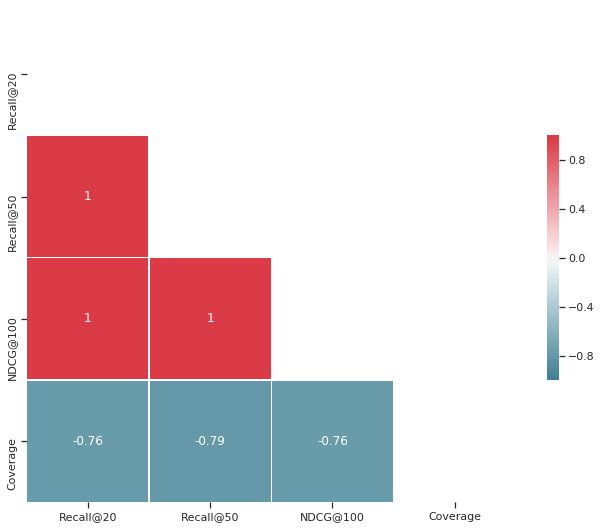

In [15]:
# Compute the correlation matrix
corr = df[["Recall@20","Recall@50","NDCG@100","Coverage"]].corr()
print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns_plot = sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
fig = sns_plot.get_figure()
#fig.savefig("corr.pdf")

[Text(0,0,'poisson'),
 Text(0,0,'logcosh'),
 Text(0,0,'log_loss'),
 Text(0,0,'mean_squared_error'),
 Text(0,0,'squared_hinge'),
 Text(0,0,'cosine_proximity')]

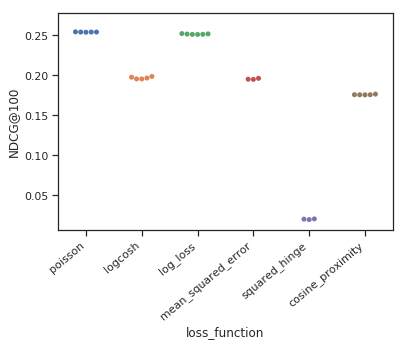

In [19]:
sns.set(style="ticks")
sns_plot = sns.swarmplot(x="loss_function", y="NDCG@100",data=df)
#sns_plot.set(xlim=(-0.0001, 0.0004))
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=40, ha="right")

In [ ]:
fig = sns_plot.get_figure()
#fig.savefig("NDCG_l1_rate_ml.pdf", bbox_inches = "tight")

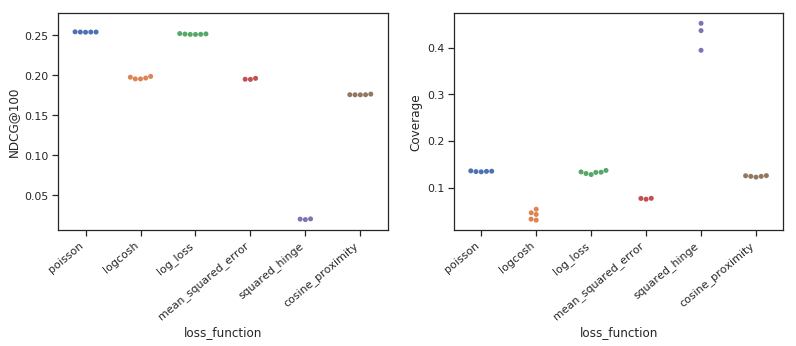

In [23]:
fig, ax =plt.subplots(1,2, figsize=(13,4))
sns_plot = sns.swarmplot(x="loss_function", y="NDCG@100",data=df, ax=ax[0])
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=40, ha="right")
sns_plot = sns.swarmplot(x="loss_function", y="Coverage",data=df, ax=ax[1])
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=40, ha="right")
fig.show()

In [ ]:
#fig.savefig("NDCG_Coverage_multiple_HL_ml.pdf", bbox_inches = "tight")